Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [369]:
from random import random, seed
from itertools import product
import numpy as np
import timeit

from icecream import ic
from tqdm.auto import tqdm
from matplotlib import pyplot as plt
from itertools import accumulate

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [370]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [371]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)


In [372]:
mincost=min(COSTS)

## Helper Functions

In [373]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def valid2(solution):
    """Checks whether solution is valid (i.e., covers all universe)"""
    # Logical OR over selected sets
    covered_universe = np.zeros(SETS.shape[1], dtype=bool)
    
    for i in np.where(solution)[0]:  # Only loop through 'True' solutions
        covered_universe |= SETS[i]
        # Exit early if the universe is fully covered
        if np.all(covered_universe):
            return True
    
    # Check if universe is fully covered at the end
    return np.all(covered_universe)

def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()



In [374]:
len(SETS)

10000

## Have Fun!

In [375]:
# A dumb solution of "all" sets
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)

t1 = timeit.timeit(lambda: cost(solution), number=100)
ic(t1)


ic| t1: 0.0011258179983997252


0.0011258179983997252

In [376]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
ic(solution,len(solution))
valid(solution), cost(solution)

ic| solution: array([ True, False,  True, ...,  True,  True, False])
    len(solution): 10000


(np.True_, np.float64(423491375.15364313))

In [377]:
def fitness(solution : np.array)-> int:
    costo=-cost(solution)
    if valid2(solution):
       
       costo=costo+1000000
        #ic(pos)
        
    
    return costo

In [378]:



def tweak(solution : np.array)-> np.array:
    new_solution = solution.copy()
    pos = rng.integers(0,NUM_SETS)
    
    
    new_solution[pos] = not new_solution[pos]
    return new_solution

In [379]:
def tweak2(solution : np.array)-> np.array:   #non funziona
    n_tweaks=5
    new_solution = solution.copy()
    pos = rng.integers(0,NUM_SETS)
    current_solution=solution.copy()
    current_fit=fitness(solution)
    

    for step in range(n_tweaks):
        new_solution[pos] = not new_solution[pos]
        sol_fit=fitness(solution)
       
        if sol_fit>current_fit:
            current_solution = new_solution[:]
            current_fit=sol_fit
        
        new_solution[pos] = not new_solution[pos]
    
    
    
    return current_solution

In [399]:
def tweak3(solution : np.array,step: int,max_step :int)-> np.array:
    #size_change=1
    #size_change=1+(2*(max_step -step))//max_step
    #size_change=1+((max_step -step))//max_step
    size_change=(20*(max_step -step))//max_step
    
    new_solution = solution.copy()
    
    rints = rng.integers(low=0, high=NUM_SETS, size=size_change)
    for el in rints:
        new_solution[el] = not new_solution[el]

    
    
    
    
    return new_solution

ic| current_solution: array([False, False, False, ..., False, False, False])


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

ic| cost(defsol): np.float64(2167226.4640653897)
    valid(defsol): np.True_
ic| history.index(cost(defsol)): 1931015, nrun: 2


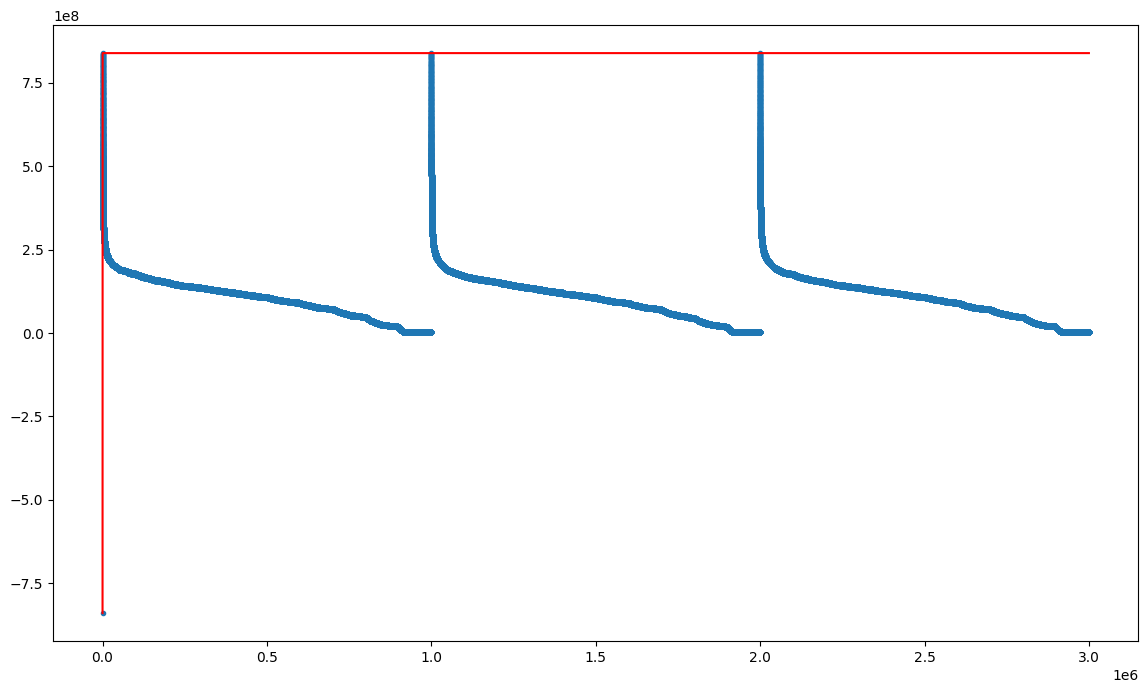

In [400]:
current_solution = solution[:]

max_steps=1000000
n_restart=3
ic( current_solution)
#while  valid(current_solution)==False or steps<max_steps:

#current_fit=fitness(current_solution)
#tcost=timeit.timeit(lambda: cost(current_solution), number=100000)
#tfittweak=timeit.timeit(lambda: tweak(current_solution), number=100000)

#tevalu=timeit.timeit(lambda: fitness(current_solution), number=10)
#tevalid=timeit.timeit(lambda: valid(current_solution), number=1000)
#tevalid2=timeit.timeit(lambda: valid2(current_solution), number=1000)
#ic(tcost,tfittweak,tevalu,tevalid,tevalid2)

history = []
i=0

for nres in tqdm(range(n_restart)):
    current_solution = rng.random(NUM_SETS) < (0.2+(1+nres))
    current_fit=fitness(current_solution)
    if(nres==0):
        defsol=current_solution[:]
        defit=fitness(defsol)
        history.append(defit)



    for step in tqdm(range(max_steps)):
        i+=1

        
        
            
        solution = tweak3(current_solution,step,max_steps)
        #ic( current_solution,solution)
        sol_fit=fitness(solution)

        
        history.append(cost(solution))
        #if sol_fit>current_fit:
        #    print("Arrays are good")
        #else:
        #        print("Arrays are bad")
    
        if sol_fit>current_fit:
            current_solution = solution
            current_fit=sol_fit
            i=0
            if sol_fit>defit:
                defsol = solution[:]
                defit=sol_fit
               
        

        #if(i>=max_steps/10):
        #    break

            #ic(step, current_solution)
 

ic(cost(defsol),valid(defsol))

nrun=history.index(cost(defsol))//max_steps +1
ic(history.index(cost(defsol)),nrun )
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")


#plt.ylim(1554298, 3054298)